In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython.display import display
from scipy.stats import skew

# Load data
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

# First look at the data
print(train.shape)
display(train.head())

#NaN
train.fillna(value=-999.0,inplace=True)
test.fillna(value=-999.0,inplace=True)

print('Type numeric:')
list_feature_Nan = []
for i in train.select_dtypes(exclude=['object']).columns:
    if (train[i] == -999.0).astype(int).sum() > 0:
        print("Feature: ", i, "has", round(((train[i] == -999.0).astype(int).sum()/1460)*100), "% of NaN")
        list_feature_Nan.append(i)

print('Type object:') 

for i in train.select_dtypes(include=['object']).columns:
    if (train[i] == -999.0).astype(int).sum() > 0:
        print("Feature: ", i, "has", round(((train[i] == -999.0).astype(int).sum()/1460)*100), "% of NaN") 
   

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Type numeric:
Feature:  LotFrontage has 18 % of NaN
Feature:  MasVnrArea has 1 % of NaN
Feature:  GarageYrBlt has 6 % of NaN
Type object:
Feature:  Alley has 94 % of NaN
Feature:  MasVnrType has 1 % of NaN
Feature:  BsmtQual has 3 % of NaN
Feature:  BsmtCond has 3 % of NaN
Feature:  BsmtExposure has 3 % of NaN
Feature:  BsmtFinType1 has 3 % of NaN
Feature:  BsmtFinType2 has 3 % of NaN
Feature:  Electrical has 0 % of NaN
Feature:  FireplaceQu has 47 % of NaN
Feature:  GarageType has 6 % of NaN
Feature:  GarageFinish has 6 % of NaN
Feature:  GarageQual has 6 % of NaN
Feature:  GarageCond has 6 % of NaN
Feature:  PoolQC has 100 % of NaN
Feature:  Fence has 81 % of NaN
Feature:  MiscFeature has 96 % of NaN


In [2]:
#Replace numeric feature by mean
#train_replace_mean = train
#test_replace_mean = test

for i in list_feature_Nan:
    train[i].replace(-999.0,train[i].mean(),inplace=True)
    test[i].replace(-999.0,train[i].mean(),inplace=True)

#train = train[np.log(train['SalePrice'])<13.5]    
#train = train[np.log(train['SalePrice'])>10.60]  
#train.reset_index(inplace=True,drop=True)

y = np.array(pd.DataFrame(np.log(train.SalePrice)))
y2 = np.array(pd.DataFrame(np.log(train.SalePrice)))

mean_saleprice = pd.DataFrame(train.groupby(['GrLivArea'])['LotArea'].mean())
mean_saleprice.columns = ['LotArea_bis']

train.drop('SalePrice',axis=1,inplace=True)    

#log transform skewed numeric features:
all_data = all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],test.loc[:,'MSSubClass':'SaleCondition']))
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

print(skewed_feats)

train[skewed_feats] = np.log1p(train[skewed_feats])
test[skewed_feats] = np.log1p(test[skewed_feats])

train[skewed_feats] = train[skewed_feats].fillna(all_data[skewed_feats].mean())
test[skewed_feats] = test[skewed_feats].fillna(all_data[skewed_feats].mean())

Index(['MSSubClass', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'KitchenAbvGr', 'TotRmsAbvGrd', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')


In [3]:
#Label Encoder
le = preprocessing.LabelEncoder()
train_str = train.select_dtypes(include=['object'])
test_str = test.select_dtypes(include=['object']) 
display(train_str.head())

print(train_str.columns.values)

train.drop(train_str.columns.values,axis=1,inplace=True)
test.drop(train_str.columns.values,axis=1,inplace=True)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,-999,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,-999,-999,-999,WD,Normal
1,RL,Pave,-999,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,-999,-999,-999,WD,Normal
2,RL,Pave,-999,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,-999,-999,-999,WD,Normal
3,RL,Pave,-999,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,-999,-999,-999,WD,Abnorml
4,RL,Pave,-999,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,-999,-999,-999,WD,Normal


['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition']


In [4]:
train_str_dum = pd.get_dummies(train_str)
test_str_dum = pd.get_dummies(test_str)

columns_dum = list(set(train_str_dum) & set(test_str_dum))

train_str_dum = train_str_dum[columns_dum]
test_str_dum = test_str_dum[columns_dum]

#New train and New test
train_flo = train.select_dtypes(exclude=['object'])
test_flo = test.select_dtypes(exclude=['object']) 

new_train = pd.merge(train_flo,train_str_dum,left_index=True,right_index=True)
new_test = pd.merge(test_flo,test_str_dum,left_index=True,right_index=True)

display(new_train.head())
print(new_train.columns.values)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType_Attchd,Neighborhood_SawyerW,RoofStyle_Gable,Exterior2nd_AsphShn,RoofStyle_Flat,Neighborhood_NAmes,Exterior1st_HdBoard,SaleCondition_Partial,Exterior1st_VinylSd,MiscFeature_Gar2
0,1,4.110874,65.0,9.042040,7,5,2003,2003,5.283204,6.561031,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,3.044522,80.0,9.169623,6,8,1976,1976,0.000000,6.886532,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,4.110874,68.0,9.328212,7,5,2001,2002,5.093750,6.188264,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,4.262680,60.0,9.164401,7,5,1915,1970,0.000000,5.379897,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,4.110874,84.0,9.565284,8,5,2000,2000,5.860786,6.486161,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea'
 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr'
 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt' 'GarageCars'
 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch'
 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold' 'Fence_GdWo'
 'Condition2_Feedr' 'Exterior1st_Wd Sdng' 'Foundation_BrkTil'
 'Exterior1st_AsbShng' 'MSZoning_RH' 'Foundation_Wood' 'HeatingQC_TA'
 'GarageQual_TA' 'Condition1_RRAn' 'Alley_-999.0' 'ExterQual_Ex'
 'Exterior2nd_Stone' 'Condition2_Norm' 'Neighborhood_SWISU'
 'Exterior2nd_CmentBd' 'Neighborhood_MeadowV' 'BsmtQual_Fa' 'GarageQual_Po'
 'Neighborhood_BrDale' 'MSZoning_C (all)' 'BsmtCond_TA' 'LandContour_HLS'
 'ExterCond_TA' 'Exterior1st_Plywood' 'MSZoning_RM' 'KitchenQual_Ex'
 'Neighborhood_Sawyer' 'RoofStyle_M

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD, SparsePCA

#train_clf = new_train.drop('SalePrice',axis=1)
train_clf = new_train.copy()
train_clf.drop('Id',axis=1,inplace=True)

index = pd.DataFrame(test.Id,columns = ['Id'])
test_clf = new_test.drop('Id',axis=1)

train_clf2 = train_clf.drop(['LotFrontage','MasVnrArea','GarageYrBlt'],axis=1)
train_clf2 = pd.merge(train_clf2,train[['LotFrontage','MasVnrArea','GarageYrBlt']],left_index=True,right_index=True)
train_clf2['tot_sf'] = train_clf2['TotalBsmtSF'] + train_clf2['GrLivArea']
train_clf2['ratio_fl'] = train_clf2['2ndFlrSF'] / train_clf2['1stFlrSF'] 
train_clf2['garage_ex'] = (train_clf2['GarageQual_Gd'] + train_clf2['GarageQual_TA'] + train_clf2['GarageQual_Fa'] + train_clf2['GarageQual_Po']) * (train_clf2['GarageCond_Ex'])

clus = KernelPCA(n_components = 25)
train_clf2_pca = clus.fit_transform(train_clf2)
train_clf3 = pd.merge(train_clf2,pd.DataFrame(train_clf2_pca),left_index=True,right_index=True)

test_clf2 = test_clf.drop(['LotFrontage','MasVnrArea','GarageYrBlt'],axis=1)
test_clf2 = pd.merge(test_clf2,test[['LotFrontage','MasVnrArea','GarageYrBlt']],left_index=True,right_index=True)
test_clf2['tot_sf'] = test_clf2['TotalBsmtSF'] + test_clf2['GrLivArea']
test_clf2['ratio_fl'] = test_clf2['2ndFlrSF']  / test_clf2['1stFlrSF']
test_clf2['garage_ex'] = (test_clf2['GarageQual_Gd'] + test_clf2['GarageQual_TA'] + test_clf2['GarageQual_Fa'] + test_clf2['GarageQual_Po']) * (test_clf2['GarageCond_Ex'])

test_clf3 = pd.merge(test_clf2,pd.DataFrame(clus.transform(test_clf2)),left_index=True,right_index=True)

index = pd.DataFrame(test.Id,columns = ['Id'])


def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def score(clf, train_np, random_state, folds, target, length):
    kf = KFold(n = length , n_folds=folds, shuffle = True, random_state = random_state)
    for itrain, itest in kf:
        Xtr, Xte = train_np[itrain], train_np[itest]
        ytr, yte = target[itrain], target[itest]
        clf.fit(Xtr, ytr.ravel())
        pred = pd.DataFrame(clf.predict(Xte))
        return rmse(yte, pred)
    return rmse(y, pred)

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
from scipy import stats

#Delete z_score > 4 feature = GrLivArea
#z_score = pd.DataFrame(stats.zscore(pd.DataFrame(y), axis=1))
#z_score.columns = train_clf3.columns
#print(z_score[z_score['GrLivArea']>4].index)

#train_clf4 = train_clf3.drop(train_clf3.index[z_score[z_score['GrLivArea']>4].index])
#y_bis =  pd.DataFrame(y).drop(pd.DataFrame(y).index[z_score[z_score['GrLivArea']>4].index])
#y_bis_array = np.array(y_bis)
train_clf4 = train_clf3.copy()
#train_clf4['LotArea'] = np.sqrt(train_clf3['LotArea'])

#train_clf5 = train_clf3.copy()
#train_clf5['LotArea'] = np.log1p(train_clf3['LotArea'])

test_clf4 = test_clf3.copy()
#test_clf4['LotArea'] = np.sqrt(test_clf3['LotArea'])

In [7]:
for i in train_clf4.select_dtypes(include=['float64']).columns:
    if train_clf4[i].min() > test_clf4[i].min():
        train_clf4[i][train_clf4[i]==train_clf4[i].min()] = test_clf4[i].min()

for i in train_clf4.select_dtypes(include=['float64']).columns:
    if train_clf4[i].min() < test_clf4[i].min():
        test_clf4[i][test_clf4[i]==test_clf4[i].min()] = train_clf4[i].min()     

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
for i in train_clf4.select_dtypes(include=['float64']).columns:
    if train_clf4[i].max() > test_clf4[i].max():
        test_clf4[i][test_clf4[i]==test_clf4[i].max()] = train_clf4[i].max()

for i in train_clf4.select_dtypes(include=['float64']).columns:
    if train_clf4[i].max() < test_clf4[i].max():
        train_clf4[i][train_clf4[i]==train_clf4[i].max()] = test_clf4[i].max()  

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
def put_corr_feat(data,test,target):
    data_new = data.copy()
    test_new = test.copy()
    for i in data.columns:
        corr1=stats.pearsonr(np.array(pd.DataFrame(data[i])),target)[0]
        corr2=stats.pearsonr(np.array(pd.DataFrame(data[i]**3)),target)[0]
        if abs(corr2)>abs(corr1)*1.2:
            print(i)
            #print(data[i])
            #print(abs(corr2),'VS',abs(corr1))
            data_new[i]=np.array(data_new[i])**3
            #print(data_new[i])
            test_new[i]=np.array(test_new[i])**3
    return data_new, test_new
    
data1, test1 = put_corr_feat(train_clf3,test_clf3,y)

MSSubClass
OverallCond
BsmtFinSF1
TotalBsmtSF
2ndFlrSF
BsmtHalfBath
LotFrontage
tot_sf
1
12
13
16
18
19
22
24


In [10]:
import xgboost as xgb
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.linear_model import Ridge, LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LarsCV

def frange(start, stop, step):
    i = start
    a = []
    while i < stop:
        yield i
        a.append(i)
        i += step
    return a

#Cs1 = list(range(2,10,1))
#Cs1 = [15,16,17,18,19,20,21]
Cs1 = [5000,6000,7000,8000,9000,10000]
#Cs1 = [0.6,0.7,0.75,0.8,0.85,0.9]
res = []
res1 = []
res2 = []
res3 = []
res4 = []
Cs3=[]

train_np = np.array(train_clf3)
#train_np2 = np.array(data1)
robust_scaler = RobustScaler()

#for C in Cs1:
#    res1.append(score(xgb.XGBRegressor(n_estimators = C, seed = 0, learning_rate = 0.01, max_depth = 3, subsample = 0.8, colsample_bytree = 0.8, colsample_bylevel = 0.8 ),train_np,random_state = 0, folds = 7, target = y , length = 1450))
#    res2.append(score(xgb.XGBRegressor(n_estimators = C, seed = 0, learning_rate = 0.01, max_depth = 3, subsample = 0.8, colsample_bytree = 0.8, colsample_bylevel = 0.8 ),train_np,random_state = 0, folds = 7, target = y , length = 1450))
    #res3.append(score(LassoCV(alphas = [C, 1, 0.1, 0.01, 0.001, 0.0005]), train_np, random_state = 0, folds = 7, target = y , length = 1450))
    #res4.append(score(LassoCV(alphas = [C, 1, 0.1, 0.01, 0.001, 0.0005]), train_np2, random_state = 0, folds = 7, target = y , length = 1450))
    #res1.append(score(xgb.XGBRegressor(n_estimators = 100, seed = 0, learning_rate = 0.01, max_depth = 3, subsample = 0.8, colsample_bytree = 0.8, colsample_bylevel = 0.8 ),SelectKBest(f_regression, k = 268).fit_transform(train_np,y),random_state = 0, folds = 7, target = y , length = 1450))
    #res2.append(score(GradientBoostingRegressor(n_estimators = 100,learning_rate=0.005, max_depth = 3, min_samples_split=800,min_samples_leaf = 40,max_features=230,subsample = 0.85,random_state = 0),train_np,random_state = 0, folds = 7, target = y , length = 1450))
    #res3.append(score(xgb.XGBRegressor(n_estimators = C, seed = 0, learning_rate = 0.01, max_depth = 3, subsample = 0.8, colsample_bytree = 0.8, colsample_bylevel = 0.8 ),train_np,random_state = 0, folds = 7, target = y , length = 1450))
    #res3.append(score(MLPRegressor(hidden_layer_sizes=(800, ), activation = 'logistic', random_state = 0),train_np,random_state = 0, folds = C, target = y , length = 1450))
    #res4.append(score(ExtraTreesRegressor(n_estimators = 700,  max_depth = 12, min_samples_leaf = 5, random_state = 0),train_np,random_state = 0, folds = 7, target = y , length = 1450))
    #res2.append(score(xgb.XGBRegressor(n_estimators = C, seed = 0, learning_rate = 0.01, max_depth = 3, subsample = 0.8, colsample_bytree = 0.8, colsample_bylevel = 0.8 ),SelectKBest(f_regression, k = 268).fit_transform(train_np,y),random_state = 0, folds = 7))
#     res.append(score(LassoCV(alphas = [ 1, 0.1, 0.01, 0.001, 0.0005]),SelectKBest(f_regression, k = C).fit_transform(train_clf3,y),random_state = 0, folds = 7))
#     res2.append(score(LassoCV(alphas = [ 1, 0.1, 0.01, 0.001, 0.0005]),train_clf3,random_state = 0, folds = 7))
     #res2.append(score(LassoCV(alphas = [ 1, 0.1, 0.001, 0.0005]),SelectKBest(f_regression, k = 268).fit_transform(train_clf3,y),random_state = 0, folds = 7))
#for C in Cs2:    
#    res2.append(score(AdaBoostRegressor(n_estimators = C, random_state = 42, learning_rate = 0.01, base_estimator = xgb.XGBRegressor(max_depth = 8, seed = 0)),train_np,random_state = 0, folds = 10))

#p1, = plt.plot(Cs1, res1,'r-o',label="V1")
#p2, = plt.plot(Cs1, res2,'b-o',label="V2")
#p3, = plt.plot(Cs1, res3,'g-o',label="V3")
#p4, = plt.plot(Cs1, res4,'y-o',label="V4")
#plt.legend([p1,p2])
#plt.show()

In [11]:
print(res)
print(res2)
print(res3)
print(res4)

[]
[]
[]
[]


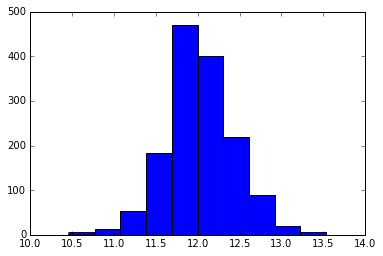

In [12]:
plt.hist(y)
plt.show()

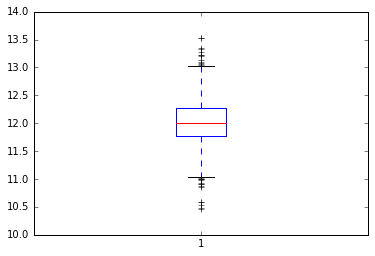

In [13]:
plt.boxplot(y)
plt.show()

In [14]:
index = pd.DataFrame(test.Id,columns = ['Id'])

In [15]:
## import libraries
import numpy as np
np.random.seed(123)

import pandas as pd
import subprocess
from scipy.sparse import csr_matrix, hstack
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.advanced_activations import PReLU

ntrain = train_clf4.shape[0]
sparse_data = []
tr_te = pd.concat((train_clf4, test_clf4), axis = 0)

tmp = csr_matrix(tr_te)
sparse_data.append(tmp)

xtr_te = hstack(sparse_data, format = 'csr')
xtrain = xtr_te[:ntrain, :]
xtest = xtr_te[ntrain:, :]

def batch_generator(X, y, batch_size, shuffle):
    #chenglong code for fiting from generator (https://www.kaggle.com/c/talkingdata-mobile-user-demographics/forums/t/22567/neural-network-for-sparse-matrices)
    number_of_batches = np.ceil(X.shape[0]/batch_size)
    counter = 0
    sample_index = np.arange(X.shape[0])
    if shuffle:
        np.random.shuffle(sample_index)
    while True:
        batch_index = sample_index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X[batch_index,:].toarray()
        y_batch = y[batch_index]
        counter += 1
        yield X_batch, y_batch
        if (counter == number_of_batches):
            if shuffle:
                np.random.shuffle(sample_index)
            counter = 0

def batch_generatorp(X, batch_size, shuffle):
    number_of_batches = X.shape[0] / np.ceil(X.shape[0]/batch_size)
    counter = 0
    sample_index = np.arange(X.shape[0])
    while True:
        batch_index = sample_index[batch_size * counter:batch_size * (counter + 1)]
        X_batch = X[batch_index, :].toarray()
        counter += 1
        yield X_batch
        if (counter == number_of_batches):
            counter = 0
def nn_model():
    model = Sequential()
    model.add(Dense(10, input_dim = xtrain.shape[1], init = 'he_normal'))
    model.add(PReLU())
    model.add(Dropout(0.4))
    model.add(Dense(5, init = 'he_normal'))
    model.add(PReLU())
    model.add(Dropout(0.2))
    model.add(Dense(1, init = 'he_normal'))
    model.compile(loss = 'mse', optimizer = 'adadelta')
    return(model)

## cv-folds
nfolds = 2
folds = KFold(len(y), n_folds = nfolds, shuffle = True, random_state = 111)

## train models
i = 0
nbags = 2
nepochs = 1
pred_oob = np.zeros(xtrain.shape[0])
pred_test = np.zeros(xtest.shape[0])
def model():
    for (inTr, inTe) in folds:
        xtr = xtrain[inTr]
        ytr = y[inTr]
        xte = xtrain[inTe]
        yte = y[inTe]
        pred = np.zeros(xte.shape[0])
        for j in range(nbags):
            model = nn_model()
            fit = model.fit_generator(generator = batch_generator(xtr, ytr, 64, True),
                                      nb_epoch = nepochs,
                                      samples_per_epoch = xtr.shape[0],
                                      verbose = 0)
            pred += model.predict_generator(generator = batch_generatorp(xte, 50, False), val_samples = xte.shape[0])[:,0]
            score = rmse(np.exp(yte), np.exp(pred))
            print(score)
            pred_test += model.predict_generator(generator = batch_generatorp(xtest, 25, False), val_samples = xtest.shape[0])[:,0]
        pred /= nbags
        pred_oob[inTe] = pred
        #score = rmse(yte, pred)
        i += 1
        #print('Fold ', i, '- rmse:', score)

Using TensorFlow backend.


In [16]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso

#clf = LassoCV(alphas = [ 1, 0.1, 0.001, 0.0005], max_iter = 1000)
clf = xgb.XGBRegressor(n_estimators = 5000, seed = 0, learning_rate = 0.01, max_depth = 3, subsample = 0.8, colsample_bytree = 0.8, colsample_bylevel = 0.8 )
clf2 = Ridge(alpha=21)
clf3 = LassoCV(alphas = [1, 0.1, 0.001, 0.0005])
#clf4 = GradientBoostingRegressor(n_estimators = 6000,learning_rate=0.005, max_depth = 3, min_samples_split=800,min_samples_leaf = 40,max_features=230,subsample = 0.85,random_state = 0)
#clf5 = RandomForestRegressor(n_estimators = 750, max_depth = 8, min_samples_leaf = 2, random_state = 0)
Select = SelectKBest(f_regression, k = 268)

train_fin = np.array(Select.fit_transform(train_clf4,y))
test_fin = np.array(Select.transform(test_clf4))

train_fin_ridge = np.array(robust_scaler.fit_transform(train_clf3))
test_fin_ridge = np.array(robust_scaler.transform(test_clf3))

kf1 = KFold(n = 1450 , n_folds=7, random_state=0, shuffle = True)
#kf2 = KFold(n = 1450 , n_folds=39, random_state=0, shuffle = True)

i = 0
res1 = []
res4 = []

for itrain, itest in kf1:
    i = i + 1
    Xtr, Xte = train_fin[itrain], train_fin[itest]
    ytr, yte = y[itrain], y[itest]
    clf.fit(Xtr, ytr.ravel())
    if i == 1:
        pred1 = pd.DataFrame(clf.predict(test_fin))
        print("Fold 1 :", rmse(yte, pd.DataFrame(clf.predict(Xte))))
        res1.append(rmse(yte, pd.DataFrame(clf.predict(Xte))))
    if i > 1 :
        pred1 = pred1 + pd.DataFrame(clf.predict(test_fin))
        print("Fold ",i, " :", rmse(yte, pd.DataFrame(clf.predict(Xte))))
        res1.append(rmse(yte, pd.DataFrame(clf.predict(Xte))))

        
#clf.fit(train_fin, y)
#pred_1 = pd.DataFrame(clf.predict(test_fin))
        
clf2.fit(train_fin_ridge, y)
pred2 = pd.DataFrame(clf2.predict(test_fin_ridge))
        
clf3.fit(train_fin_ridge, y)
pred3 = pd.DataFrame(clf3.predict(test_fin_ridge))
        
pred_1 = pred1/7 


for i in pred2[np.exp(pred2).values<1].index.values:
    pred2[pred2.index == i] = pred_1[pred_1.index == i]


for i in pred2[pred2.values>12].index.values:
    pred2[pred2.index == i] = pred_1[pred_1.index == i]
    
print(np.mean(res1))

pred_1 = (pred_1+2*pred2+pred3)/4
pred_2 = (pred_1+pred3)/2
pred_xg = pred_1

pred_1.columns = ['SalePrice']
pred_2.columns = ['SalePrice']
pred_xg.columns = ['SalePrice']
pred3.columns = ['SalePrice']

pred_final_1 = pd.DataFrame(np.exp(pred_1), index = new_test.index, columns = ['SalePrice'])
pred_final_2 = pd.DataFrame(np.exp(pred_2), index = new_test.index, columns = ['SalePrice'])
pred_Lasso = pd.DataFrame(np.exp(pred3), index = new_test.index, columns = ['SalePrice'])
pred_xg = pd.DataFrame(np.exp(pred_xg), index = new_test.index, columns = ['SalePrice'])

#replace by mean
for i in pred_final_1[pred_final_1.values<100].index.values:
    pred_final_1[pred_final_1.index == i] = 180921.1959
    
pred_final = pred_final_1

pred_submit = pd.merge(index,pred_final,left_index=True,right_index=True)
pred_Lasso_submit = pd.merge(index,pred_Lasso,left_index=True,right_index=True)
pred_xg_submit = pd.merge(index,pred_xg,left_index=True,right_index=True)
pred_xg_lasso_submit = pd.merge(index,pred_final_2,left_index=True,right_index=True)

pred_submit.to_csv('XG_Ridge_Lasso.csv',index=False)
pred_Lasso_submit.to_csv('Lasso.csv',index=False)
pred_xg_submit.to_csv('XGB.csv',index=False)
pred_xg_lasso_submit.to_csv('XGB_Lasso.csv',index=False)

/opt/conda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fold 1 : 0    0.099958
dtype: float64
Fold  2  : 0    0.13436
dtype: float64
Fold  3  : 0    0.129743
dtype: float64
Fold  4  : 0    0.144006
dtype: float64
Fold  5  : 0    0.109624
dtype: float64
Fold  6  : 0    0.09484
dtype: float64
Fold  7  : 0    0.103533
dtype: float64


/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1077: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.116580700176
